In [1]:
import numpy as np
import matplotlib.pyplot as plt

def graficar(f, x_i, x_f, num=1000):
    plt.style.use("seaborn-v0_8-darkgrid")
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: gráfica de la función
    """
    x = np.linspace(x_i, x_f, num)
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()
    return None

def metodo_biseccion(f, a, b, tol=1e-4, num=100, verbose=2):
    if (f(a)*f(b)>=0):
        if verbose==1:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    while n <= num:
        p_i = (a + b)/2
        if verbose==1:
            print(f'ite:{n}, a:{a:.5f}, b:{b:.5f}, p_{n}:{p_i:.5f}')
        if f(p_i) == 0:
            if verbose==1:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(b - a)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_regulafalsi(f, a, b, tol=1e-4, num=100, verbose=2):
    if (f(a)*f(b)>=0):
        if verbose==1:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    p_0 = a
    while n <= num:
        p_i = a - f(a)*((b-a)/(f(b) - f(a)))
        if verbose==1:
            print(f'ite:{n}, a:{a:.9f}, b:{b:.9f}, p_{n}:{p_i:.9f}')
        if f(p_i) == 0:
            if verbose==1:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(p_i - p_0)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
        p_0 = p_i
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_newton_raphson(f, df, p_0, tol=1e-4, num=100, verbose=2):
    n = 1
    if verbose==1:
        print(f'ite:0, p_0:{p_0:.9f}')
    while n <= num:
        if df(p_0) == 0:
            print('El método no funciona, df(p_0) = 0')
        p_i = p_0 - f(p_0)/df(p_0)
        if verbose==1:
            print(f'ite:{n}, p_{n}:{p_i:.9f}')
        if f(p_i) == 0:
            if verbose==2:
                print(f'Solución exacta encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i
        error = abs(p_i - p_0)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i
        n += 1
        p_0 = p_i
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_secante(f, p_i, p_j, tol=1e-4, num=100, verbose=True):
    n = 1
    if verbose:
        print(f'ite:0, p_i:{p_i:.9f}, p_j:{p_j:.9f}')
    while n <= num:
        if f(p_i) - f(p_j) == 0:
            print('El método no funciona, df(p_0) = 0')
        p_n = p_i - f(p_i)*((p_j - p_i)/(f(p_j)-f(p_i)))
        if verbose:
            print(f'ite:{n}, p_j:{p_j:.9f}, p_{n}:{p_n:.9f}')
        if f(p_n) == 0:
            if verbose:
                print(f'Solución exacta encontrada: {p_n}')
            return p_n
        error = abs(p_n - p_j)
        if error <= tol:
            if verbose:
                print(f'Solución aproximada encontrada: {p_n}')
                print(f'número de iteraciones: {n}')
            return p_n
        n += 1
        p_i, p_j = p_j, p_n
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def met_punto_fijo(g, p_0, tol=1e-4, n=200, verbose=True):
    """
    Método del punto fijo
    :param g: Funcion transformada -> punto fijo
    :param p_0: semilla
    :param tol: toleracia, criterio de parada
    :param n: número máximo de iteraciones, criterio de parada
    :param verbose:
    :param print_error:
    :param deploy_error:
    :return: solución exacta o aproximada, si tiene.
    """
    i = 1
    lista_errores = list()
    while i <= n:
        try:
            p_i = g(p_0)
            e_abs = abs(p_0 - p_i)
            lista_errores.append(e_abs)
            if verbose:
                print(f'ite {i:<2}: p_{i - 1:<2}={p_0:.5f} p_{i:<2}={p_i:.7f}'
                  f' | e_abs: {e_abs:e}')
            if g(p_i) == p_i:
                print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
                return p_i

            if e_abs < tol:
                print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
                return p_i

        except OverflowError:
            print('solución no encontrada, OverflowError')
            return None
        p_0 = p_i
        i += 1
    print('solución no encontrada, iteraciones agotadas')
    return None

# Ejercicio 01
Utilice algún método visto para encontrar dos número reales $x$, con seis cifras decimales correctas, tal que la matriz:
$$
A= \begin{bmatrix}
	1 &  2 &  3 &  x\\
	4 &  5 &  x &  6\\
	7 &  x &  8 &  9\\
	x &  10 & 11& 12\\
\end{bmatrix}
$$

$$\left|
\begin{array}{cccc}
 1 & 2 & 3 & x \\
 4 & 5 & x & 6 \\
 7 & x & 8 & 9 \\
 x & 10 & 11 & 12 \\
\end{array}
\right|=3 \left|
\begin{array}{ccc}
 4 & 5 & 6 \\
 7 & x & 9 \\
 x & 10 & 12 \\
\end{array}
\right|-x \left|
\begin{array}{ccc}
 4 & 5 & x \\
 7 & x & 8 \\
 x & 10 & 11 \\
\end{array}
\right|-2 \left|
\begin{array}{ccc}
 4 & x & 6 \\
 7 & 8 & 9 \\
 x & 11 & 12 \\
\end{array}
\right|+1 \left|
\begin{array}{ccc}
 5 & x & 6 \\
 x & 8 & 9 \\
 10 & 11 & 12 \\
\end{array}
\right|$$

$$3 \left(
4 \left(
\begin{array}{cc}
 x & 9 \\
 10 & 12 \\
\end{array}
\right)
-5 \left(
\begin{array}{cc}
 7 & 9 \\
 x & 12 \\
\end{array}
\right)
+6 \left(
\begin{array}{cc}
 7 & x \\
 x & 10 \\
\end{array}
\right)\right)

-x \left(
4 \left(
\begin{array}{cc}
 x & 8 \\
 10 & 11 \\
\end{array}
\right)
-5 \left(
\begin{array}{cc}
 7 & 8 \\
 x & 11 \\
\end{array}
\right)
+x \left(
\begin{array}{cc}
 7 & x \\
 x & 10 \\
\end{array}
\right)\right)$$

$$-2 \left(
4 \left(
\begin{array}{cc}
 8 & 9 \\
 11 & 12 \\
\end{array}
\right)
-x \left(
\begin{array}{cc}
 7 & 9 \\
 x & 12 \\
\end{array}
\right)+6 \left(
\begin{array}{cc}
 7 & 8 \\
 x & 11 \\
\end{array}
\right)
\right)
+1 \left(
5 \left(
\begin{array}{cc}
 8 & 9 \\
 11 & 12 \\
\end{array}
\right)
-x \left(
\begin{array}{cc}
 x & 9 \\
 10 & 12 \\
\end{array}
\right)+6 \left(
\begin{array}{cc}
 x & 8 \\
 10 & 11 \\
\end{array}
\right)\right)$$

$$
+1 (6 (11 x-8\cdot 10)-x (12 x-9\cdot 10)+5 (8\cdot 12-9\cdot 11))
-2 (6 (7\cdot 11-8 x)-x (7\cdot 12-9 x)+4 (8\cdot 12-11\cdot 9))$$
$$+3 \left(6 \left(7\cdot 10-x^2\right)+4 (12 x-9\cdot 10)-5 (7\cdot 12-9 x)\right)
-x \left(x \left(7\cdot 10-x^2\right)+4 (11 x-8\cdot 10)-5 (7\cdot 11-8 x)\right)$$

$$|A| = x^4-202 x^2+1404 x-2475 = 1000$$

Ahora, se debe plantear al ecuación $f(x) = 0$, entonces:
$$f(x) = x^4-202 x^2 + 1404 x - 2475 - 1000$$

## Soluciones

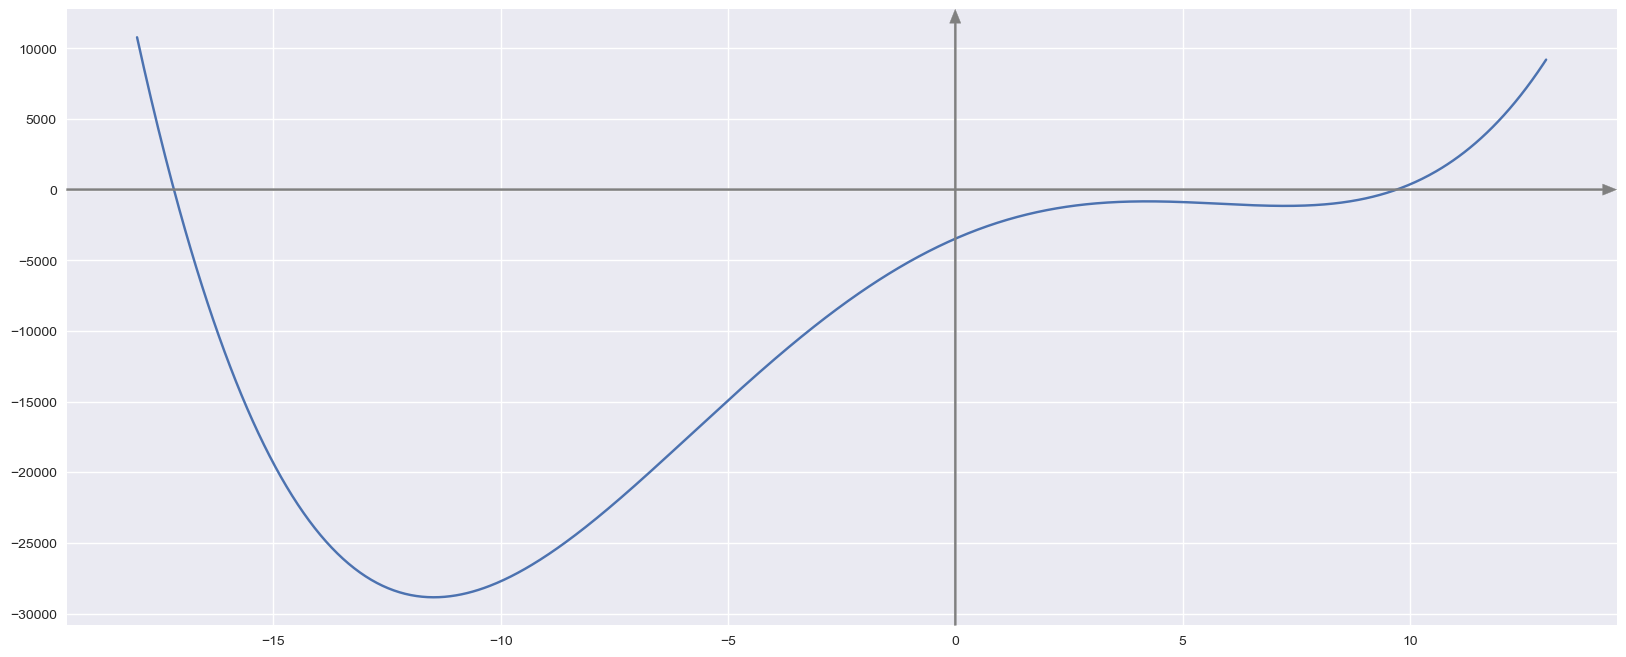

In [13]:
# Posibles soluciones
f = lambda x: -3475 + 1404*x - 202*x**2 + x**4
graficar(f, -18, 13)

In [5]:
#sol cercana a -15
f = lambda x: -3475 + 1404*x - 202*x**2 + x**4
df = lambda x: 1404 - 202*2*x + 4*x**3
print('Solución 1')
x_1 = metodo_newton_raphson(f, df, -18, 1e-6)

Solución 1
Solución aproximada encontrada: -17.188498151088705
número de iteraciones: 4


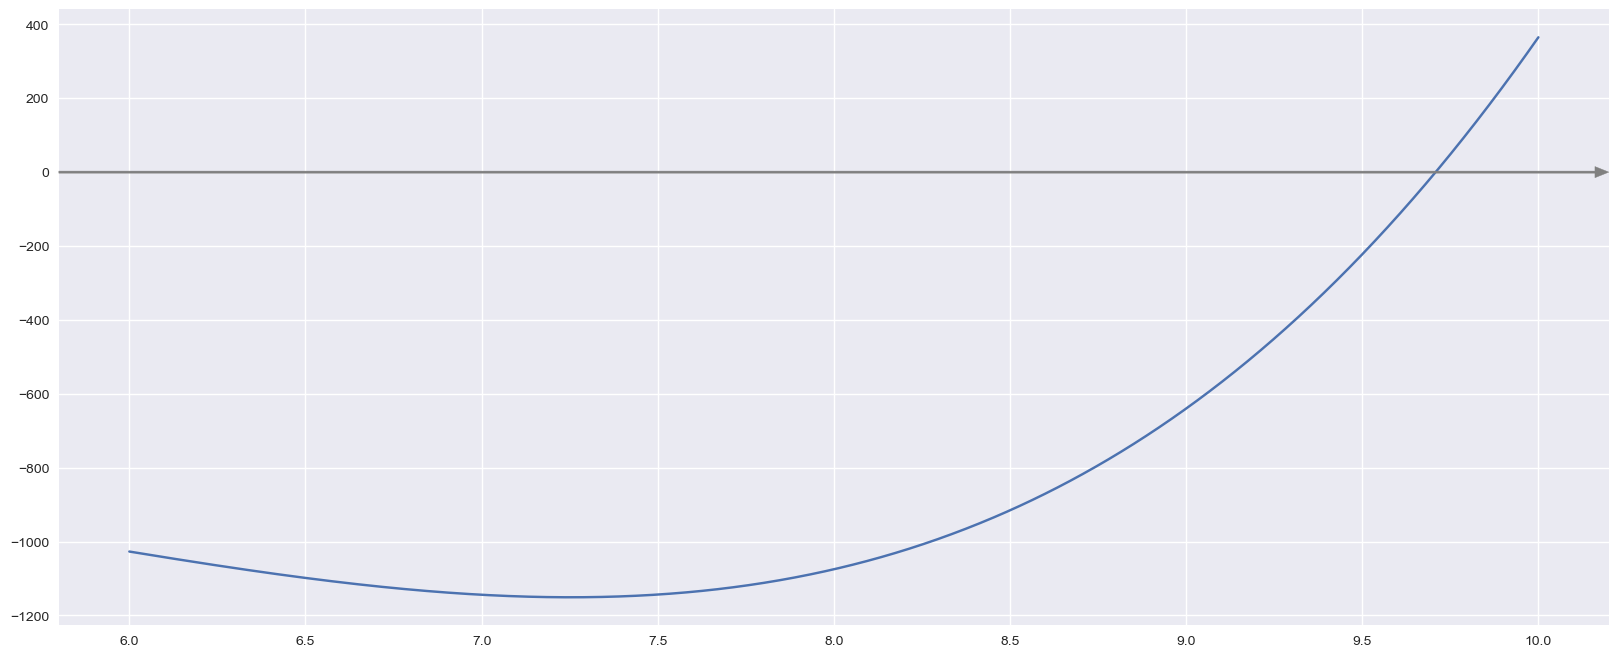

In [14]:
# Posibles soluciones
graficar(f, 6, 10)

In [7]:
#sol cercana a 8
print('Solución 2')
x_2 = metodo_newton_raphson(f, df, 8, 1e-6)

Solución 2
Solución aproximada encontrada: 9.708299123255088
número de iteraciones: 7


## Prueba de los determinantes

In [8]:
x = x_1
n_A = np.array([[1, 2, 3, x], [4, 5, x, 6],[7, x, 8, 9],[x, 10, 11, 12]])
det = np.linalg.det(n_A)
print(f'solución x: {x}, determinante = {det}')

solución x: -17.188498151088705, determinante = 1000.0000000000068


In [9]:
x = x_2
n_A = np.array([[1, 2, 3, x], [4, 5, x, 6],[7, x, 8, 9],[x, 10, 11, 12]])
det = np.linalg.det(n_A)
print(f'solución x: {x}, determinante = {det}')

solución x: 9.708299123255088, determinante = 1000.0000000000016


# Ejercicio 02

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5416\2175735341.py:4: RuntimeWarning: divide by zero encountered in divide
  f_4 = lambda w: -((g)/(2*w**2))*((np.exp(w*t) - np.exp(-w*t))/(2) - np.sin(w*t)) - x
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5416\2175735341.py:4: RuntimeWarning: invalid value encountered in multiply
  f_4 = lambda w: -((g)/(2*w**2))*((np.exp(w*t) - np.exp(-w*t))/(2) - np.sin(w*t)) - x


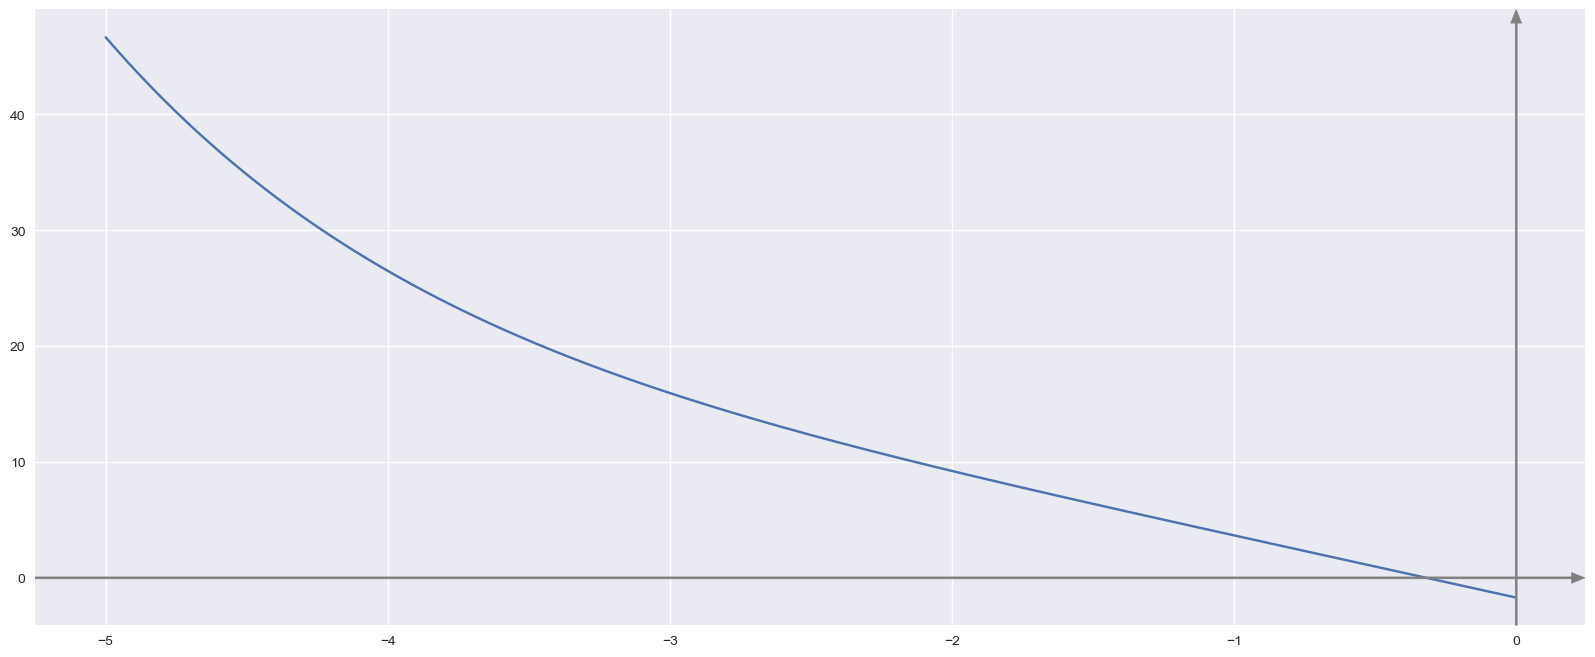

In [16]:
x = 1.7
t = 1
g = 32.17
f_4 = lambda w: -((g)/(2*w**2))*((np.exp(w*t) - np.exp(-w*t))/(2) - np.sin(w*t)) - x
graficar(f_4, -5,0)

In [17]:
metodo_biseccion(f_4, -5, 0, 1e-5)

ZeroDivisionError: float division by zero

In [18]:
f_4(0)

ZeroDivisionError: float division by zero

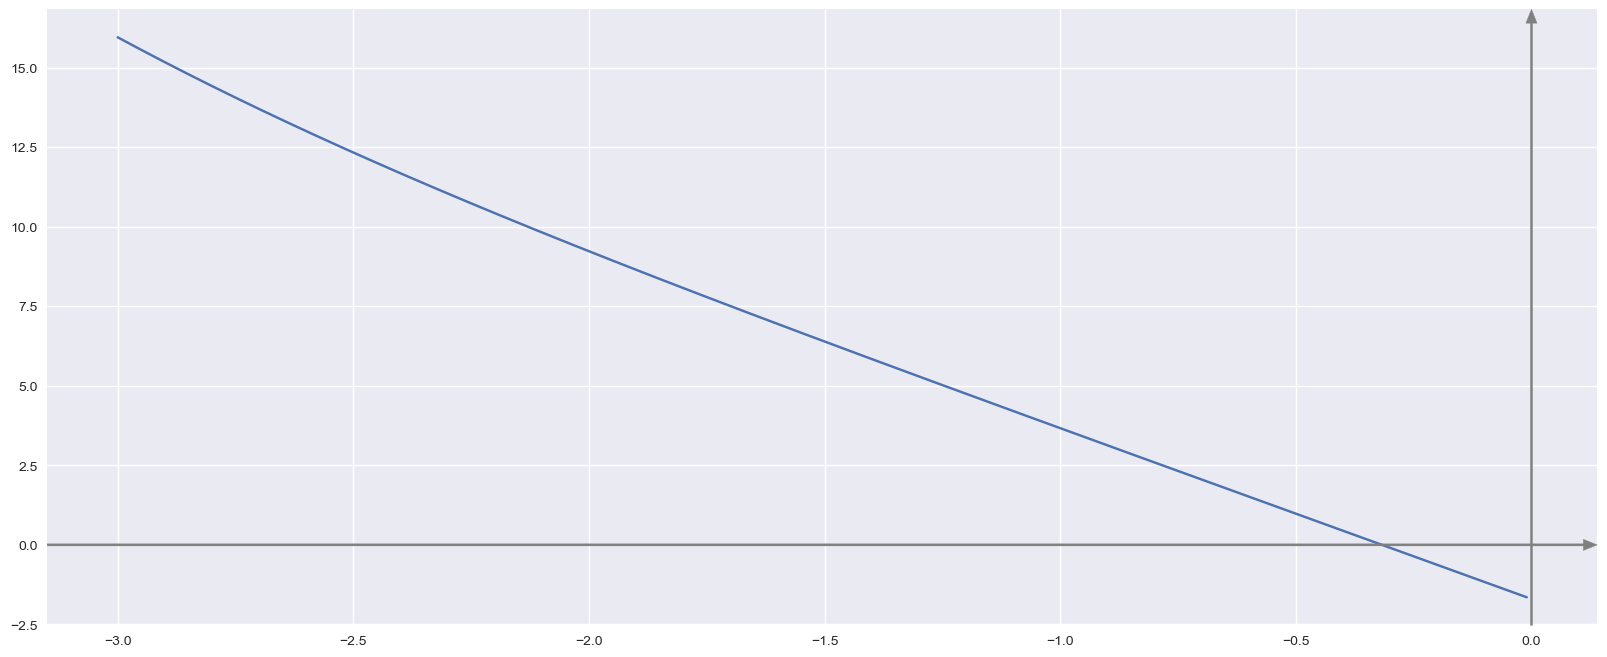

In [19]:
graficar(f_4, -3, -0.01)

In [20]:
metodo_biseccion(f_4, -3, -0.01, 1e-5)

Solución aproximada encontrada: -0.31706229209899894
número de iteraciones: 20


-0.31706229209899894

# Ejercicio 03

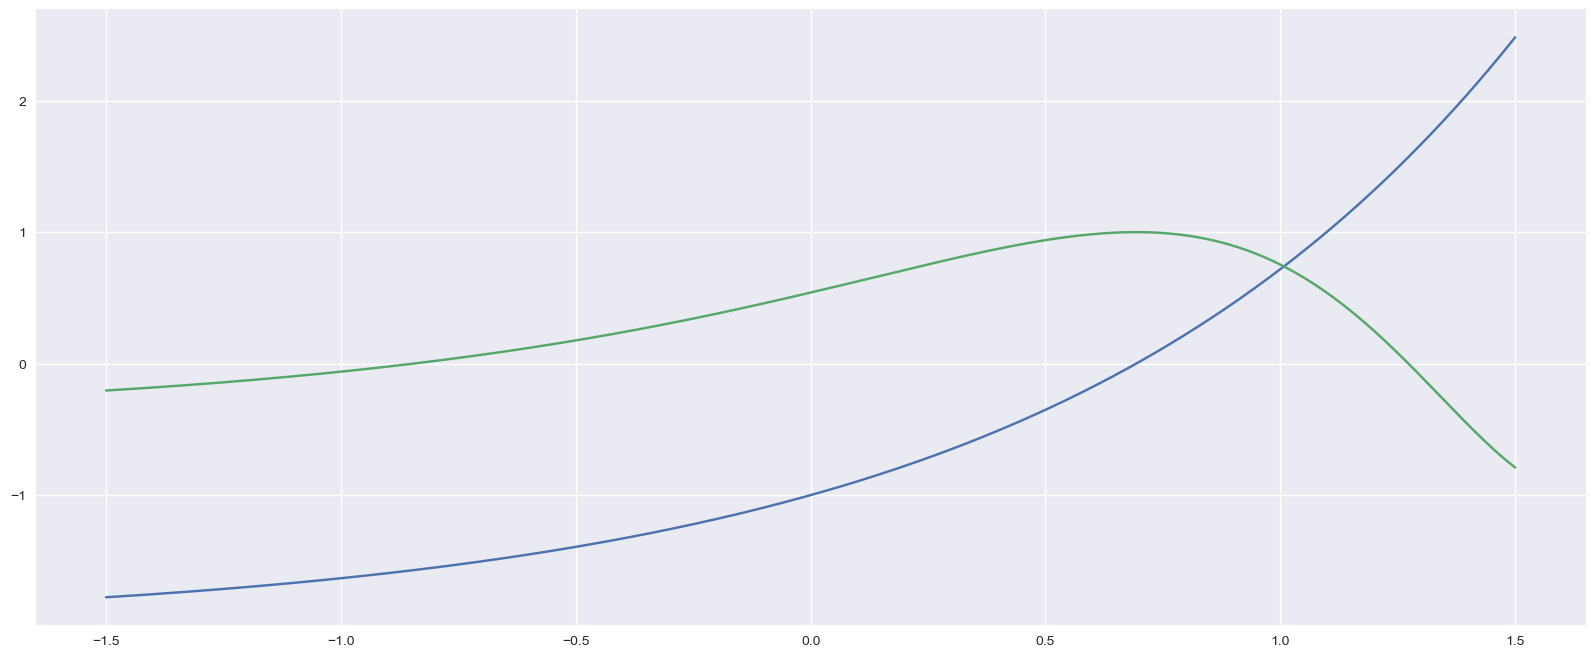

In [21]:
import matplotlib.pyplot as plt
f_1 = lambda x: np.exp(x) - 2
f_2 = lambda x: np.cos(np.exp(x) - 2)
x = np.linspace(-1.5, 1.5, 1000)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(x, f_1(x))
ax.plot(x, f_2(x))
plt.show()

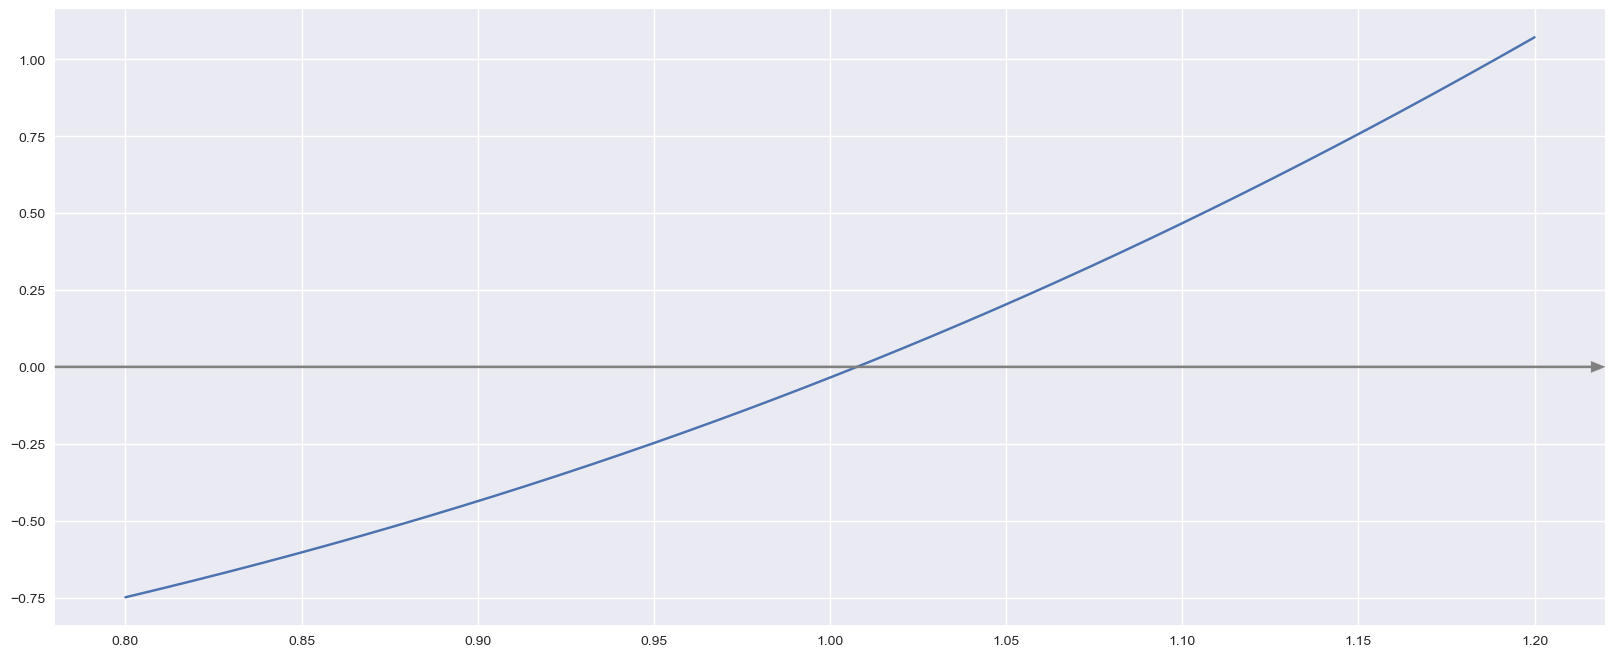

In [22]:
f_3 = lambda x: np.exp(x) - 2 - (np.cos(np.exp(x) - 2))
graficar(f_3, 0.8, 1.2)

In [24]:
metodo_secante(f_3, 1, 1.05, 1e-5, 100)

ite:0, p_i:1.000000000, p_j:1.050000000
ite:1, p_j:1.050000000, p_1:1.007277829
ite:2, p_j:1.007277829, p_2:1.007608353
ite:3, p_j:1.007608353, p_3:1.007623978
ite:4, p_j:1.007623978, p_4:1.007623972
Solución aproximada encontrada: 1.0076239716580337
número de iteraciones: 4


1.0076239716580337

In [25]:
f_3(1.007623971658034)

-4.708455847435289e-13

# Ejercicio 04

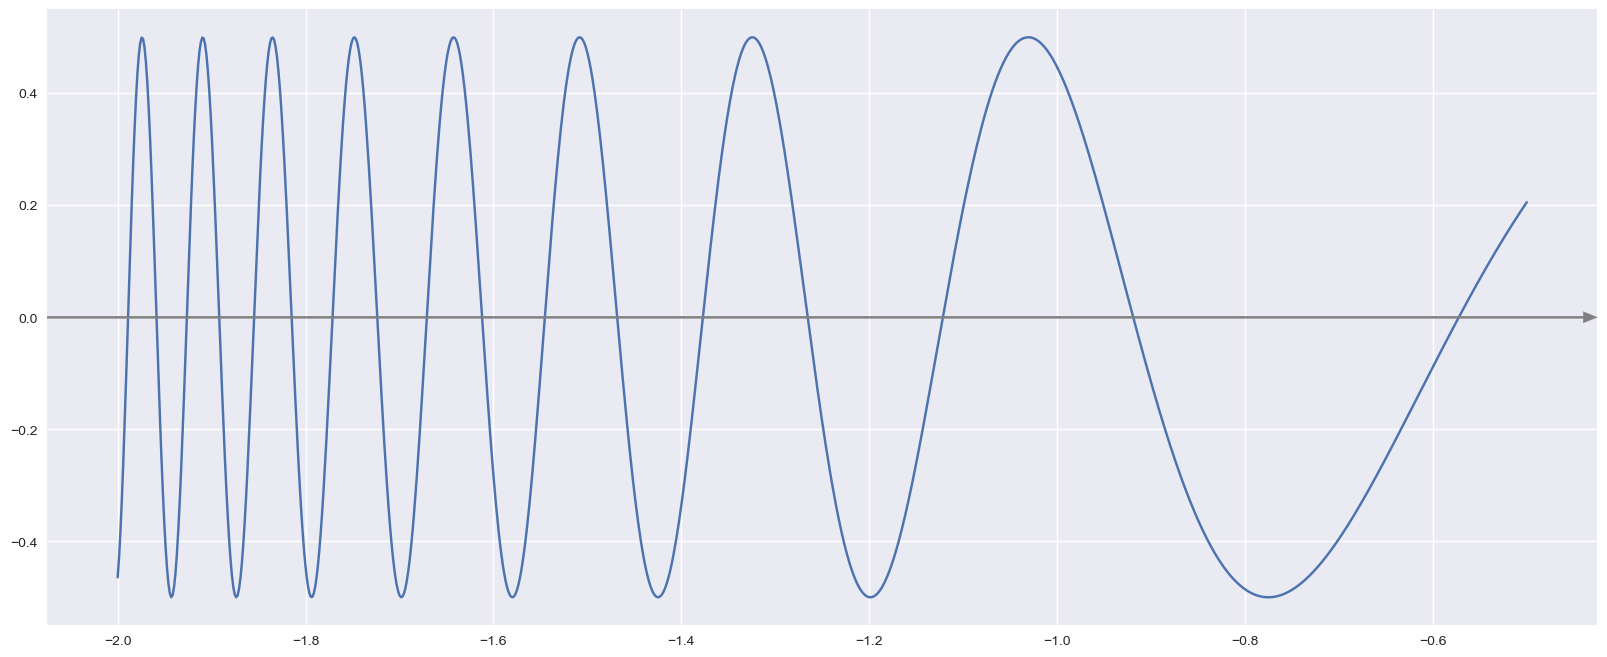

In [46]:
f_5 = lambda x: 0.5*np.sin(np.exp(-2*x))
graficar(f_5, -2, -0.5)

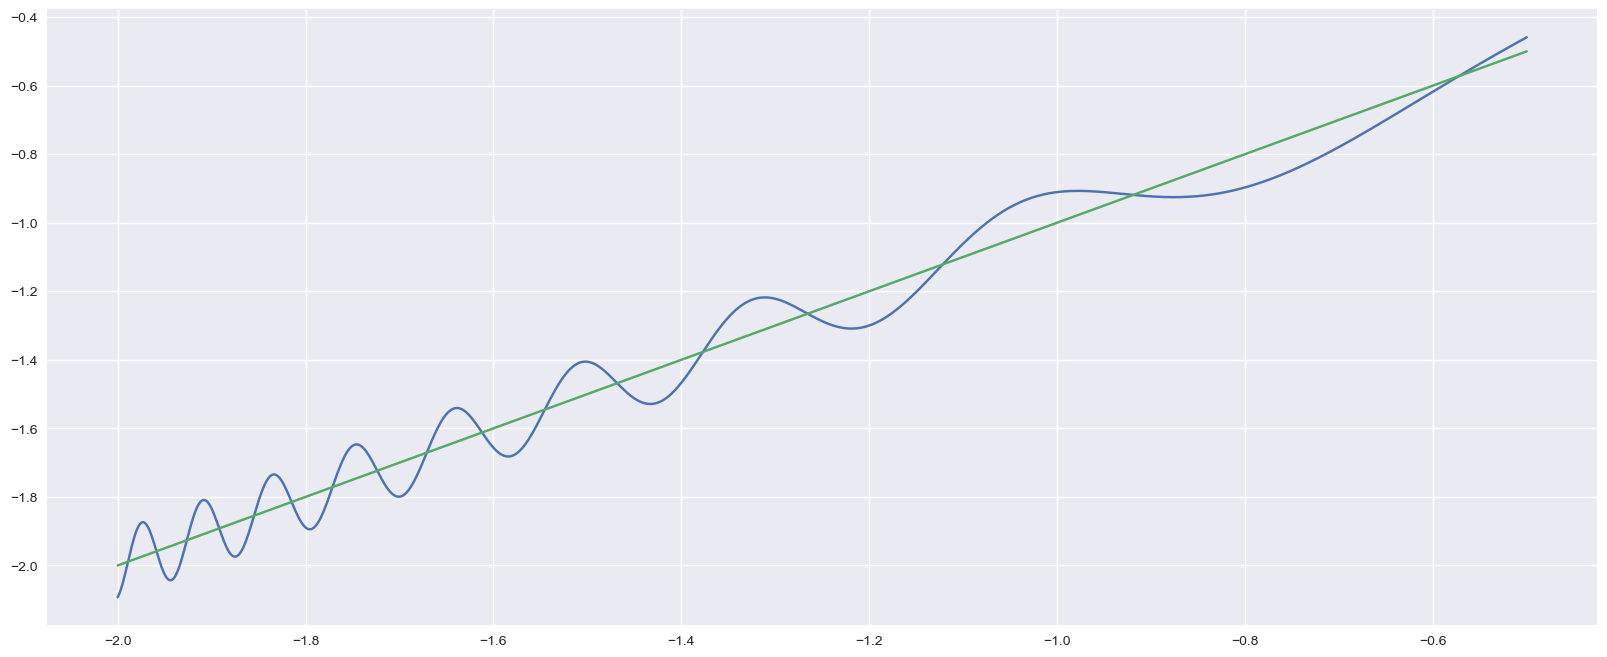

In [67]:
g = lambda x: 0.1*np.sin(np.exp(-2*x))+x
x = np.linspace(-2, -0.5, 1000)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(x, g(x))
ax.plot(x, x)
plt.show()

In [73]:
met_punto_fijo(g, -0.8, tol=1e-4, n=1000)

ite 1 : p_0 =-0.80000 p_1 =-0.8971185 | e_abs: 9.711848e-02
ite 2 : p_1 =-0.89712 p_2 =-0.9236279 | e_abs: 2.650945e-02
ite 3 : p_2 =-0.92363 p_3 =-0.9177108 | e_abs: 5.917132e-03
ite 4 : p_3 =-0.91771 p_4 =-0.9192517 | e_abs: 1.540864e-03
ite 5 : p_4 =-0.91925 p_5 =-0.9188581 | e_abs: 3.936115e-04
ite 6 : p_5 =-0.91886 p_6 =-0.9189592 | e_abs: 1.011294e-04
ite 7 : p_6 =-0.91896 p_7 =-0.9189332 | e_abs: 2.594592e-05
>>> Solución encontrada después de 7 iteraciones: x->-0.918933233965994


-0.918933233965994

In [69]:
f_5(-0.9189312091708834)

-4.6017924391510023e-05